In [ ]:
!pip install scikeras

# Вступ

**Що таке Keras?**

Keras - це високорівнева бібліотека глибокого навчання з відкритим кодом, написана на Python. Вона надає зручний та інтуїтивно зрозумілий API для побудови та тренування нейронних мереж. Keras розроблений з фокусом на швидке прототипування та експериментування, що робить його ідеальним інструментом як для початківців, так і для досвідчених дослідників.

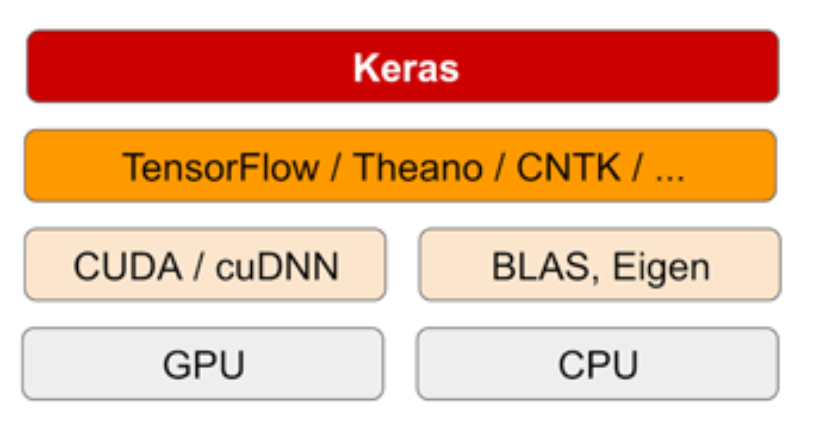

**Ключові переваги Keras:**

* **Простота використання:** Keras має простий та інтуїтивно зрозумілий API, що дозволяє швидко створювати складні нейронні мережі.
* **Гнучкість:** Keras підтримує широкий спектр архітектур нейронних мереж, включаючи згорткові, рекурентні та щільні мережі.
* **Розширюваність:** Keras дозволяє легко додавати власні шари, функції активації та оптимізатори.
* **Інтеграція з TensorFlow та іншими бекендами:** Keras може працювати з різними бекендами, включаючи TensorFlow, Theano та CNTK.

**Відмінність від TensorFlow:**

TensorFlow - це більш низькорівнева бібліотека, яка надає більшу гнучкість та контроль над процесом побудови та тренування нейронних мереж. Keras, навпаки, абстрагує багато деталей реалізації, дозволяючи користувачам зосередитися на архітектурі та функціональності мережі.

Уявіть собі, що TensorFlow - це набір інструментів для будівництва будинку, а Keras - це готовий конструктор Lego. З TensorFlow ви маєте більше контролю над процесом будівництва, але він вимагає більше часу та зусиль. З Keras ви можете швидко збирати складні моделі з готових блоків.

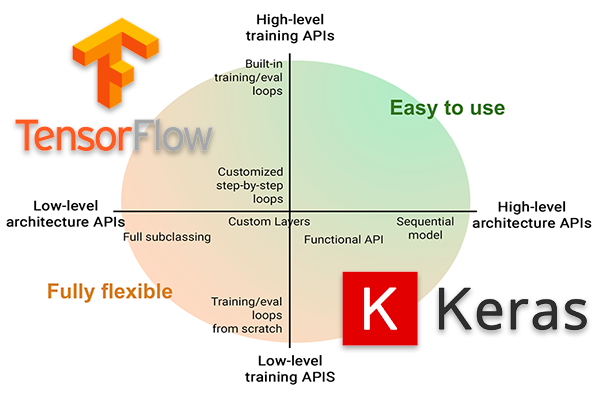

**Як з'явився Keras?**

Keras був створений Франсуа Шоле, дослідником Google, з метою спрощення процесу розробки та експериментування з нейронними мережами. Перша версія Keras була випущена в березні 2015 року.

**Для чого потрібен Keras?**

Keras використовується для широкого спектру задач глибокого навчання, включаючи:

* **Класифікація зображень:** розпізнавання об'єктів на зображеннях (наприклад, кішки, собаки, автомобілі).
* **Обробка природної мови (NLP):** аналіз тональності тексту, машинний переклад, розпізнавання мовлення, генерація тексту.
* **Генерація тексту:** створення нового тексту, схожого на заданий (наприклад, написання віршів, новинних статей).
* **Машинний переклад:** автоматичний переклад тексту з однієї мови на іншу.
* **Розпізнавання мовлення:** перетворення голосових даних у текст.

# Розбір датасетів та створення моделей

**Датасети:**

1. **IMDB:** Датасет рецензій на фільми, використовується для задач аналізу тональності тексту (sentiment analysis). Кожна рецензія позначена як позитивна або негативна.
2. **CIFAR100:** Датасет кольорових зображень, розділений на 100 класів (наприклад, літак, автомобіль, птах, кішка, олень, собака, жаба, кінь, корабель, вантажівка). Використовується для задач класифікації зображень.
3. **Fashion MNIST:** Датасет зображень одягу та взуття, розділений на 10 класів (футболка, штани, светр, сукня, пальто, сандалі, сорочка, кросівки, сумка, черевики). Використовується як альтернатива MNIST для задач класифікації зображень.

**EDA (Exploratory Data Analysis):**

EDA - це процес аналізу даних з метою розуміння їх структури, характеристик та особливостей.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# CIFAR100 Dataset

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 100 fine-grained classes that are grouped into 20 coarse-grained classes.

In [ ]:
# Завантаження датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

In [ ]:
data = np.load('oxflower17.npz')
print(data['X'].shape, data['Y'].shape)

In [ ]:
# Розмір датасету
print("Розмір тренувального датасету:", len(x_train))
print("Розмір тестового датасету:", len(x_test))

Розмір тренувального датасету: 50000
Розмір тестового датасету: 10000


In [ ]:
# Розподіл класів
unique, counts = np.unique(y_train, return_counts=True)
print("Розподіл класів у тренувальному датасеті:", dict(zip(unique, counts)))

Розподіл класів у тренувальному датасеті: {0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


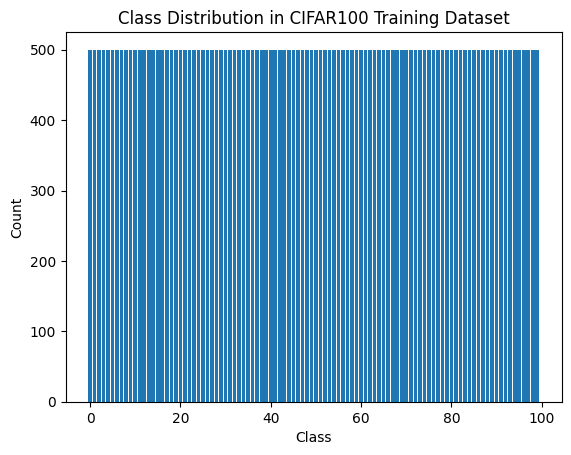

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution in CIFAR100 Training Dataset")
plt.show()

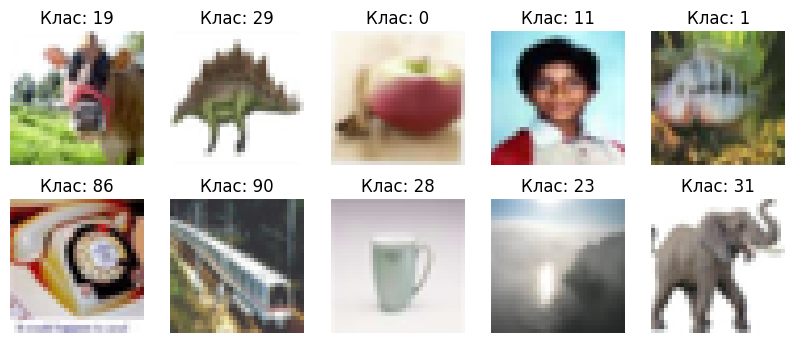

In [ ]:
# Візуалізація кількох зображень
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Клас: {y_train[i][0]}")
    ax.axis('off')
plt.show()

## Experiment

### Пояснення елементів Keras

**1. Dense:**

* `Dense` - це клас, який представляє щільний (fully connected) шар у нейронній мережі. У щільному шарі кожен нейрон попереднього шару з'єднаний з кожним нейроном поточного шару.
* **Де використовується:** `Dense` шари використовуються в багатьох типах нейронних мереж, включаючи багатошарові перцептрони (MLP), згорткові нейронні мережі (CNN) та рекурентні нейронні мережі (RNN).
* **Як використовується:**

```python
layers.Dense(units, activation=None, ...)
```

    * `units`: кількість нейронів у шарі.
    * `activation`: функція активації, яка застосовується до виходу шару.

**Приклад:**

```python
layers.Dense(64, activation='relu')
```

Цей код створює щільний шар з 64 нейронами та функцією активації ReLU.



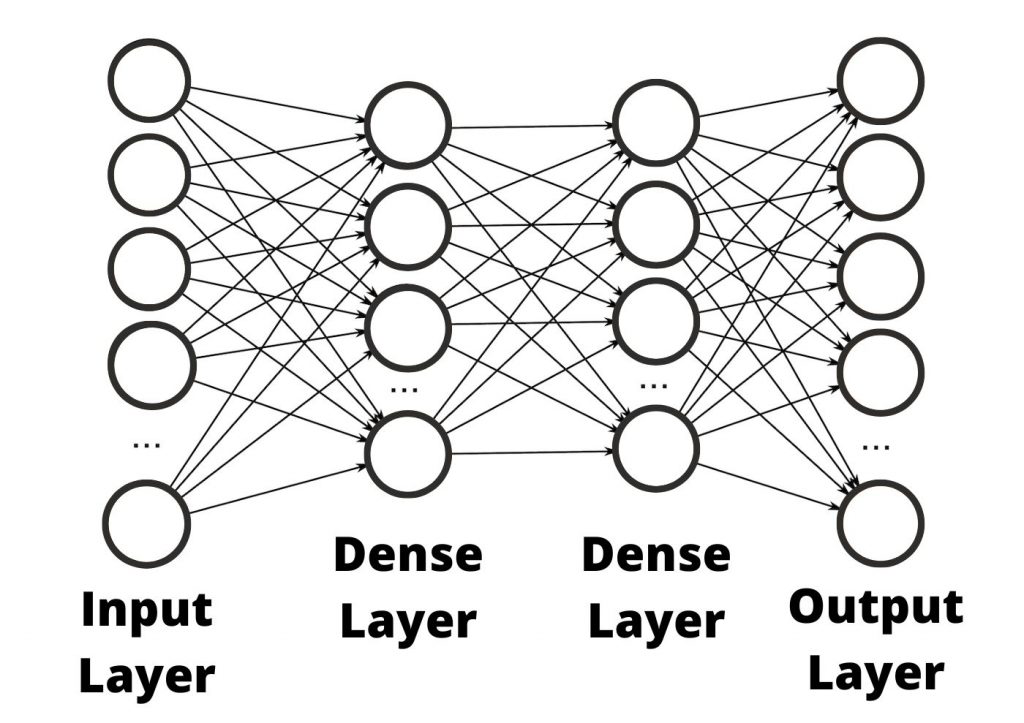

**2. Activation function:**

* `Функція активації` - це математична функція, яка застосовується до виходу нейрона. Вона визначає, чи буде нейрон "активований" і передасть сигнал далі.
* **Де використовується:** Функції активації використовуються в кожному шарі нейронної мережі, крім вхідного шару.
* **Популярні функції активації:**
    * **ReLU (Rectified Linear Unit):** `relu`
    * **Sigmoid:** `sigmoid`
    * **Tanh (Hyperbolic Tangent):** `tanh`
    * **Softmax:** `softmax` (зазвичай використовується у вихідному шарі для багатокласової класифікації)
* **Як використовується:**

```python
layers.Dense(64, activation='relu')
```

або

```python
from tensorflow.keras import activations

layers.Dense(64, activation=activations.relu)
```

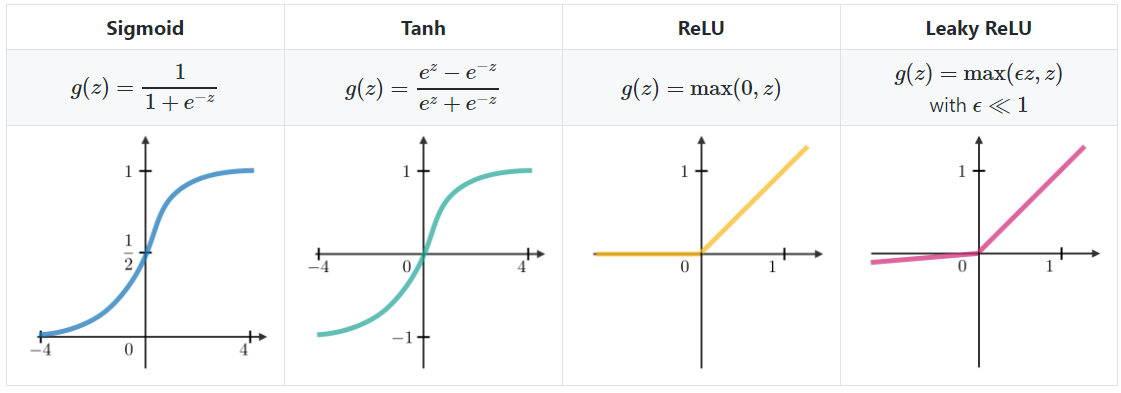

**3. Sequential:**

* `Sequential` - це клас, який дозволяє створювати нейронні мережі шляхом послідовного додавання шарів. Це найпростіший спосіб побудови нейронної мережі в Keras.
* **Де використовується:** `Sequential` модель підходить для побудови лінійних стеків шарів, де кожен шар має один вхід і один вихід.
* **Як використовується:**

```python
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])
```

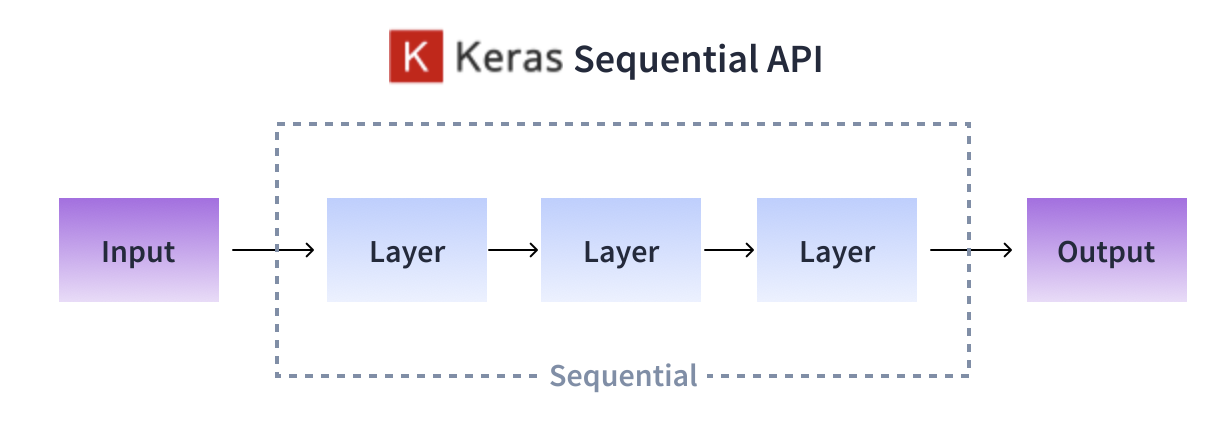

**4. Flatten:**

* `Flatten` - це шар, який перетворює багатовимірні вхідні дані (наприклад, зображення) у одновимірний вектор.
* **Де використовується:** `Flatten` шар зазвичай використовується перед щільними шарами в CNN, щоб перетворити вихід згорткових шарів у формат, який може обробляти щільний шар.
* **Як використовується:**

```python
layers.Flatten(input_shape=(28, 28)) # для зображень 28x28
```

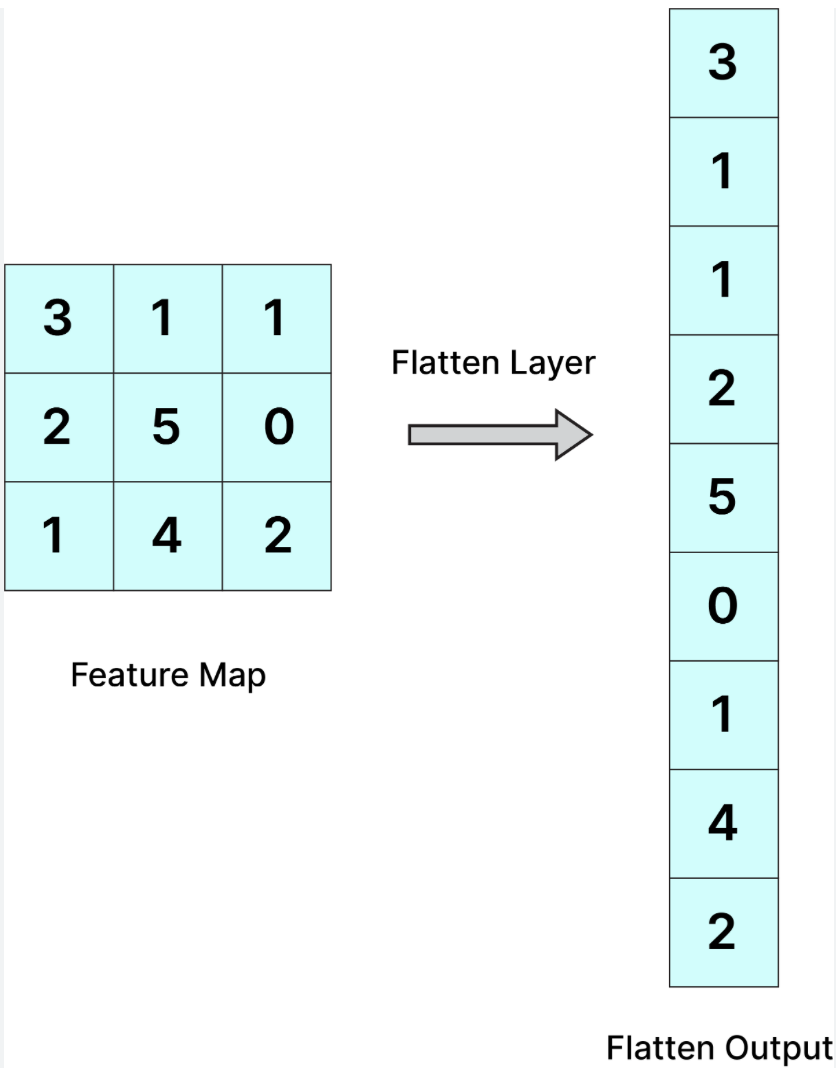

**5. Dropout:**

* `Dropout` - це техніка регуляризації, яка допомагає запобігти перенавчанню моделі. Під час тренування `Dropout` шар випадково "вимикає" деякі нейрони, що змушує модель навчатися більш стійким представленням даних.
* **Де використовується:** `Dropout` шар можна додавати після будь-якого шару в нейронній мережі.
* **Як використовується:**

```python
layers.Dropout(rate)
```

    * `rate`: ймовірність "вимикання" нейрона.

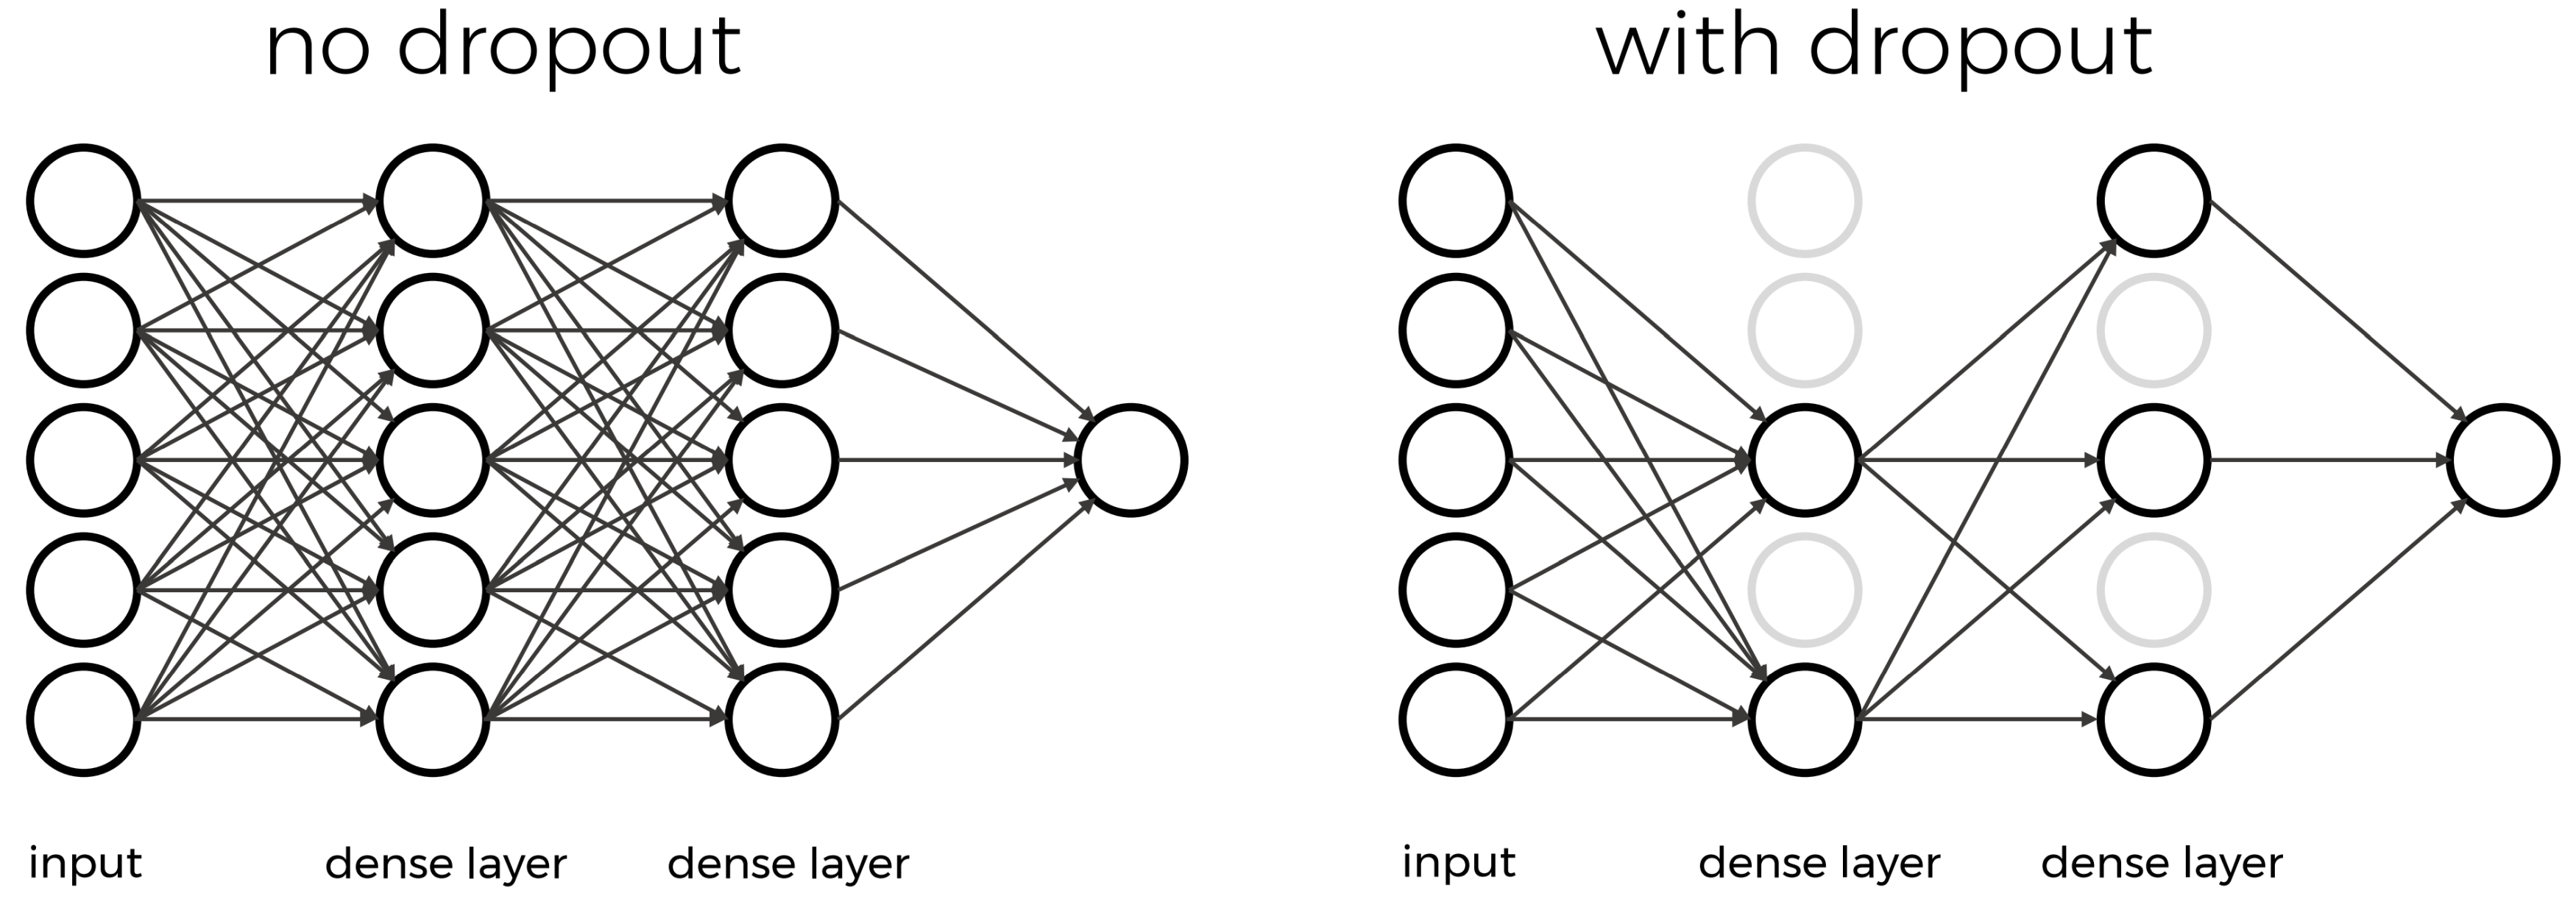

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Завантаження датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

# Нормалізація даних (приведення значень пікселів до діапазону [0, 1])
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot кодування міток (перетворення міток класів у вектори)
y_train = keras.utils.to_categorical(y_train, num_classes=100)
y_test = keras.utils.to_categorical(y_test, num_classes=100)

In [ ]:
32*32*3

3072

In [ ]:
# Створення моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)), # Перетворення зображень у вектори
    layers.Dense(512, activation='relu'), # Щільний шар з 512 нейронами та функцією активації ReLU
    layers.Dense(256, activation='relu'), # Додатковий щільний шар
    layers.Dense(100, activation='softmax') # Вихідний шар з 100 нейронами (за кількістю класів) та функцією активації softmax
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Методи `compile` та `fit` в Keras

#### **`compile`**



* Метод `compile` використовується для налаштування процесу навчання моделі. Він визначає оптимізатор, функцію втрат та метрики, які будуть використовуватись під час тренування.
* **Як використовується:**

```python
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
```

* **Атрибути:**

    * **`optimizer`:** Визначає алгоритм оптимізації, який буде використовуватися для оновлення ваг моделі під час тренування. Приклади: `'adam'`, `'sgd'`, `'rmsprop'`.
    * **`loss`:** Визначає функцію втрат, яка буде використовуватися для вимірювання "помилки" моделі. Приклади: `'binary_crossentropy'`, `'categorical_crossentropy'`, `'mse'`.
    * **`metrics`:** Визначає список метрик, які будуть використовуватись для оцінки якості моделі під час тренування та валідації. Приклади: `'accuracy'`, `'precision'`, `'recall'`.


##### Compile attributes

**Optimizer:**

* `Оптимізатор` - це алгоритм, який використовується для оновлення ваг нейронної мережі під час тренування. Мета оптимізатора - знайти набір ваг, які мінімізують функцію втрат.
* **Популярні оптимізатори:**
    * **Adam:** `adam`
    * **SGD (Stochastic Gradient Descent):** `sgd`
    * **RMSprop:** `rmsprop`
* **Як використовується:**

```python
model.compile(optimizer='adam', ...)
```

**Loss function:**

* `Функція втрат` - це математична функція, яка вимірює "помилку" моделі під час тренування. Мета тренування - мінімізувати функцію втрат.
* **Популярні функції втрат:**
    * **Binary crossentropy:** `binary_crossentropy` (для бінарної класифікації)
    * **Categorical crossentropy:** `categorical_crossentropy` (для багатокласової класифікації)
    * **Mean squared error:** `mse` (для задач регресії)
* **Як використовується:**

```python
model.compile(loss='binary_crossentropy', ...)
```

**Metrics:**

* `Метрики`- це показники, які використовуються для оцінки якості моделі.
* **Популярні метрики:**
    * **Accuracy:** `accuracy` (для задач класифікації)
    * **Precision:** `precision`
    * **Recall:** `recall`
    * **F1-score:** `f1_score`
* **Як використовуються:**

```python
model.compile(metrics=['accuracy'], ...)
```

#### **`fit`**


* **Що це:** Метод `fit` використовується для тренування моделі на заданому наборі даних.
* **Як використовується:**

```python
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_test, y_test))
```

* **Атрибути:**

    * **`x_train`:** Тренувальні дані.
    * **`y_train`:** Мітки для тренувальних даних.
    * **`epochs`:** Кількість епох (проходів по всьому тренувальному датасету).
    * **`batch_size`:** Розмір пакету (кількість прикладів, які обробляються за один раз).
    * **`validation_data`:** Кортеж `(x_val, y_val)` з валідаційними даними та мітками. Валідаційні дані використовуються для оцінки якості моделі під час тренування.
    * **`validation_split`:** Частка тренувальних даних, яка буде використовуватися як валідаційні дані (альтернатива `validation_data`).
    * **`shuffle`:** Якщо `True` (за замовчуванням), тренувальні дані будуть перемішуватися перед кожною епохою.
    * **`callbacks`:** Список callback-функцій, які будуть викликатися під час тренування. Приклади: `EarlyStopping`, `ModelCheckpoint`.

* **Повертає:** Об'єкт `History`, який містить інформацію про процес навчання (наприклад, значення втрат та метрик на кожній епосі).




In [ ]:
# Компіляція моделі (визначення оптимізатора, функції втрат та метрик)
model.compile(
    optimizer='adam', # Оптимізатор Adam
    loss='categorical_crossentropy', # Функція втрат для багатокласової класифікації
    metrics=['accuracy'] # Метрика точності
)

In [ ]:
# Тренування моделі
history = model.fit(
    x_train, y_train, # Тренувальні дані та мітки
    epochs=10, # Кількість епох (проходів по всьому датасету)
    batch_size=128, # Розмір пакету (кількість прикладів, що обробляються за один раз)
    validation_data=(x_test, y_test) # Валідаційні дані та мітки
)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0451 - loss: 4.3645 - val_accuracy: 0.1158 - val_loss: 3.8151
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1292 - loss: 3.7390 - val_accuracy: 0.1532 - val_loss: 3.6250
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1653 - loss: 3.5465 - val_accuracy: 0.1757 - val_loss: 3.5336
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1830 - loss: 3.4251 - val_accuracy: 0.1902 - val_loss: 3.4422
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2055 - loss: 3.3194 - val_accuracy: 0.1892 - val_loss: 3.4296
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2216 - loss: 3.2425 - val_accuracy: 0.2037 - val_loss: 3.3913
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2299 - loss: 3.1869 - val_accuracy: 0.2075 - val_loss: 3.3367
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2392 - loss: 3.1154 - val_accuracy: 0.

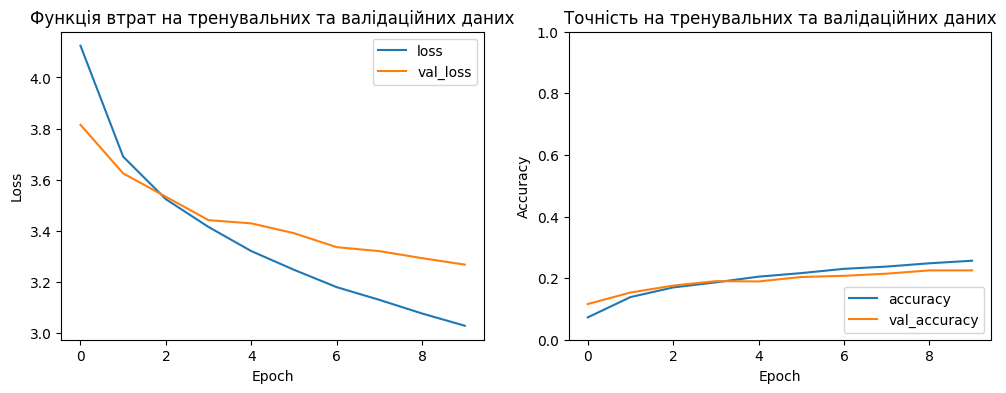

In [ ]:
# Візуалізація процесу навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Функція втрат на тренувальних та валідаційних даних")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.title("Точність на тренувальних та валідаційних даних")

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2237 - loss: 3.2628
Test accuracy: 0.22509999573230743
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


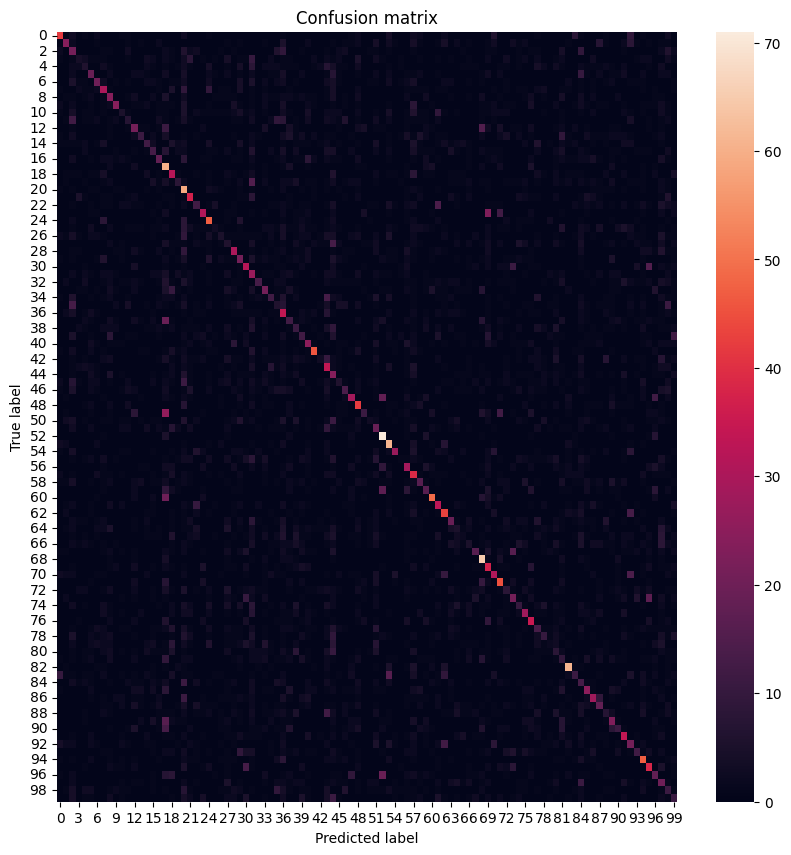

In [ ]:
# Оцінка моделі на тестових даних
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Побудова confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=False, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Як покращити:

- Збільшити кількість шарів та нейронів: додавання більшої кількості шарів та нейронів може покращити здатність моделі вивчати складні залежності в даних.
- Експериментувати з різними функціями активації: спробувати використовувати інші функції активації, такі як sigmoid або tanh.
- Використати dropout: dropout - це техніка регуляризації, яка допомагає запобігти перенавчанню моделі.
- Налаштувати гіперпараметри: експериментувати з різними значеннями learning rate, batch size та кількості епох.
- Використати data augmentation: data augmentation може допомогти збільшити розмір тренувального датасету та покращити здатність моделі до узагальнення.

# IMDB Dataset

This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".



In [ ]:
# Завантаження датасету
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [ ]:
# Розмір датасету
print("Розмір тренувального датасету:", len(train_data))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 25000
Розмір тестового датасету: 25000


In [ ]:
print(train_data[0])

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
# Розподіл класів
unique, counts = np.unique(train_labels, return_counts=True)
print("Розподіл класів у тренувальному датасеті:", dict(zip(unique, counts)))

Розподіл класів у тренувальному датасеті: {0: 12500, 1: 12500}


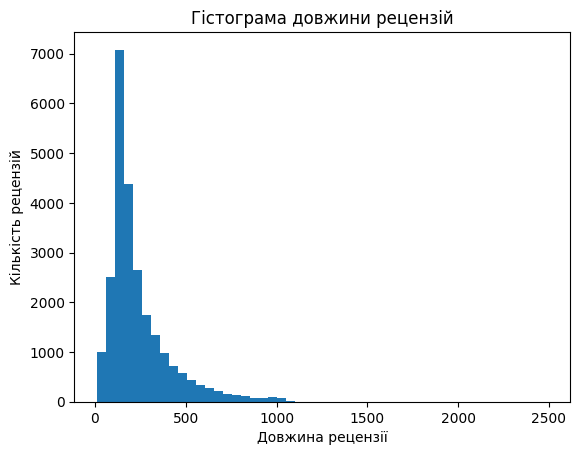

In [ ]:
# Візуалізація довжини рецензій
lengths = [len(review) for review in train_data]
plt.hist(lengths, bins=50)
plt.xlabel("Довжина рецензії")
plt.ylabel("Кількість рецензій")
plt.title("Гістограма довжини рецензій")
plt.show()

In [ ]:
min(lengths), max(lengths)

(11, 2494)

In [ ]:
# Приклад рецензії (після декодування)
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print("Приклад рецензії:", decoded_review)

Приклад рецензії: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have 

## Experiments

**NLP (Natural Language Processing):**

NLP - це область штучного інтелекту, яка займається обробкою та розумінням природної мови. NLP включає широкий спектр задач, таких як аналіз тональності тексту, машинний переклад, розпізнавання мовлення та генерація тексту.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Завантаження датасету
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Підготовка даних
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# Створення моделі
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)), # Щільний шар з 16 нейронами та функцією активації ReLU
    layers.Dense(16, activation='relu'), # Додатковий щільний шар
    layers.Dense(1, activation='sigmoid') # Вихідний шар з 1 нейроном та функцією активації sigmoid (для бінарної класифікації)
])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Тренування моделі
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=512,
    validation_data=(x_test, y_test)
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 12s 211ms/step - accuracy: 0.6955 - loss: 0.5887 - val_accuracy: 0.8744 - val_loss: 0.3391
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9104 - loss: 0.2659 - val_accuracy: 0.8850 - val_loss: 0.2867
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9369 - loss: 0.1873 - val_accuracy: 0.8828 - val_loss: 0.2886
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9492 - loss: 0.1508 - val_accuracy: 0.8799 - val_loss: 0.3062
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9644 - loss: 0.1171 - val_accuracy: 0.8761 - val_loss: 0.3328
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9715 - loss: 0.0963 - val_accuracy: 0.8716 - val_loss: 0.3642
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9787 - loss: 0.0763 - val_accuracy: 0.8671 - val_loss: 0.4052
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9866 - loss: 0.0603 - val_accuracy: 0.8659 -

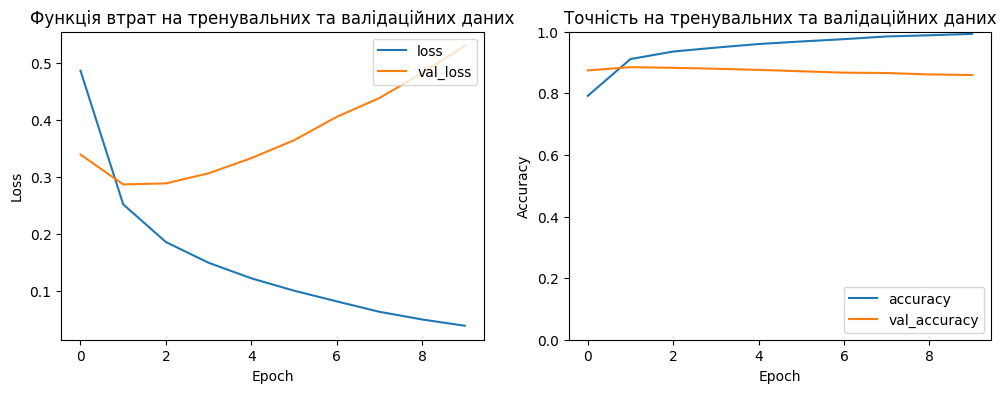

In [ ]:
# Візуалізація процесу навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Функція втрат на тренувальних та валідаційних даних")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.title("Точність на тренувальних та валідаційних даних")

plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8597 - loss: 0.5609
[0.5570757985115051, 0.8596799969673157]
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


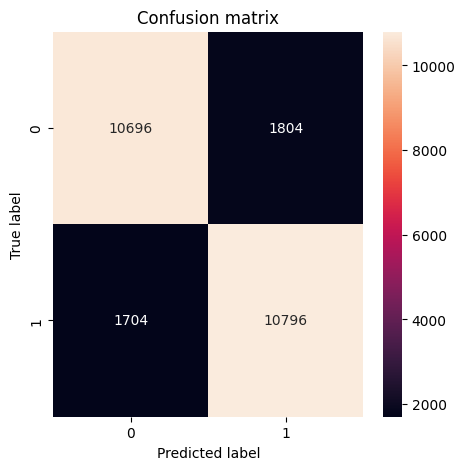

In [ ]:
# Оцінка моделі на тестових даних
results = model.evaluate(x_test, y_test)
print(results)

# Побудова confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Як можна покращити:**

- Збільшити кількість шарів та нейронів: додавання більшої кількості шарів та нейронів може покращити здатність моделі вивчати складні залежності в даних.
- Експериментувати з різними функціями активації: спробувати використовувати інші функції активації, такі як sigmoid або tanh.
- Використати dropout: dropout - це техніка регуляризації, яка допомагає запобігти перенавчанню моделі.
- Налаштувати гіперпараметри: експериментувати з різними значеннями learning rate, batch size та кількості епох.
- Використати попередньо навчені word embeddings: замість того, щоб навчати word embeddings з нуля, можна використовувати попередньо навчені word embeddings, такі як GloVe або Word2Vec.

### Improvement attempt

**Word Embeddings:**

Word embeddings - це спосіб представлення слів у вигляді векторів. Вектори слів відображають семантичну схожість між словами, тобто слова з подібним значенням будуть мати близькі вектори.

Наприклад, вектори слів "кішка" та "собака" будуть ближчими один до одного, ніж вектори слів "кішка" та "автомобіль".

**Представлення слів до моделі:**

Для того, щоб використовувати текстові дані в нейронній мережі, їх потрібно перетворити на числове представлення. Одним з найпоширеніших способів є використання word embeddings.

**Embedding:**

* `Embedding` - це шар, який перетворює цілочисельні вхідні дані (наприклад, індекси слів) у вектори щільного вбудовування (word embeddings).
* **Де використовується:** `Embedding` шар зазвичай використовується в NLP задачах для представлення слів у вигляді векторів.
* **Як використовується:**

```python
layers.Embedding(input_dim, output_dim)
```

    * `input_dim`: розмір словника (кількість унікальних слів).
    * `output_dim`: розмірність вектора вбудовування.

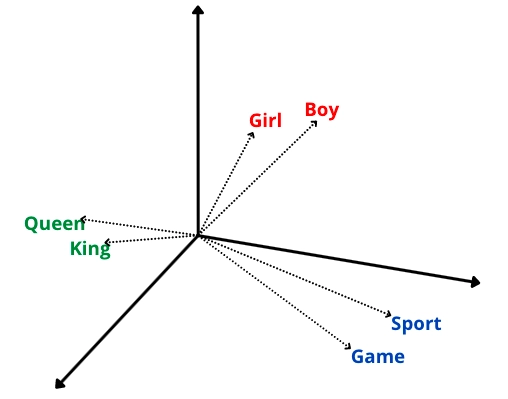

**GlobalAveragePooling1D**

* `GlobalAveragePooling1D` - це шар, який виконує глобальне усереднення по часовій осі (осі 1) вхідного тензора.
* **Де використовується:** `GlobalAveragePooling1D` часто використовується в NLP задачах після шару `Embedding` або рекурентних шарів (RNN) для зменшення розмірності даних та отримання фіксованого розміру вектора, який представляє всю послідовність.
* **Як використовується:**

```python
layers.GlobalAveragePooling1D()
```

**Приклад:**

Припустимо, у нас є тензор розміром `(batch_size, sequence_length, embedding_dim)`, який представляє батч послідовностей слів, де кожне слово представлено вектором вбудовування. `GlobalAveragePooling1D` усереднить вектори вбудовування для кожної послідовності вздовж часової осі, отримавши тензор розміром `(batch_size, embedding_dim)`.


**Переваги:**

* Зменшує кількість параметрів моделі, що може запобігти перенавчанню.
* Дозволяє працювати з послідовностями різної довжини, оскільки вихідний вектор завжди має фіксований розмір.

**Альтернатива:**

`GlobalMaxPooling1D` - виконує глобальне взяття максимуму по часовій осі.




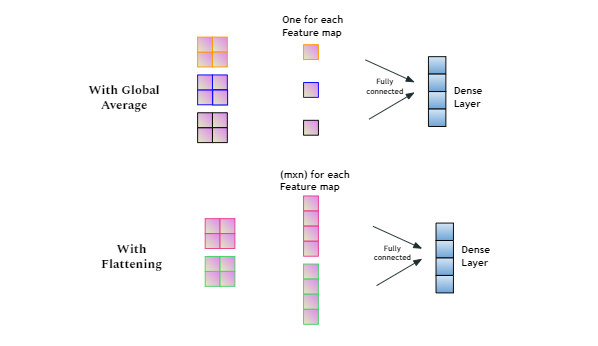

In [ ]:
output_dim = 16
max_input_lenght = 2500
max_features = 10000

In [ ]:
# Завантаження датасету
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

In [ ]:
X = np.hstack([train_data, test_data])
y = np.hstack([train_labels, test_labels])

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_padded = pad_sequences(X, maxlen=max_input_lenght)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_features, output_dim=output_dim, input_length=max_input_lenght),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history = model.fit(
    X_train, y_train,
    batch_size=128, epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.4989 - loss: 0.6937 - val_accuracy: 0.4938 - val_loss: 0.6942
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5031 - loss: 0.6934 - val_accuracy: 0.4940 - val_loss: 0.6932
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5009 - loss: 0.6933 - val_accuracy: 0.5060 - val_loss: 0.6931
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5028 - loss: 0.6933 - val_accuracy: 0.4938 - val_loss: 0.6933
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5071 - loss: 0.6931 - val_accuracy: 0.4984 - val_loss: 0.6930
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5093 - loss: 0.6932 - val_accuracy: 0.4940 - val_loss: 0.6931
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5084 - loss: 0.6931 - val_accuracy: 0.5064 - val_loss: 0.6927
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5123 - loss: 0.6927 - val_accuracy: 0

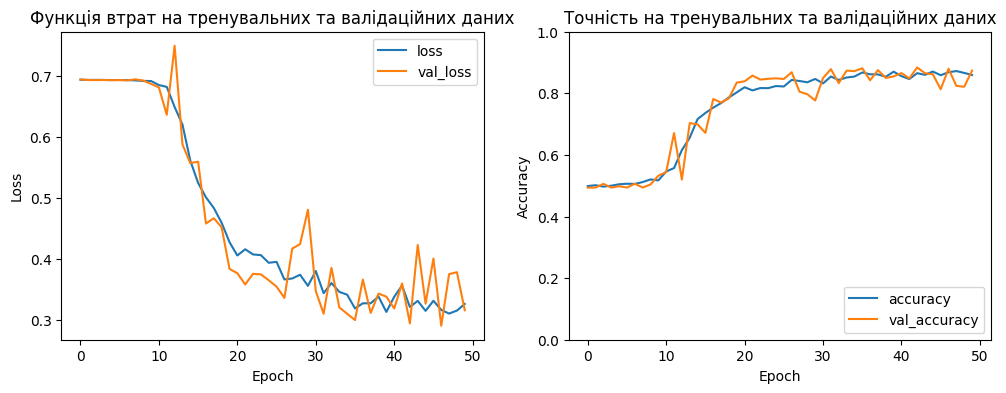

In [ ]:
# Візуалізація процесу навчання
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title("Функція втрат на тренувальних та валідаційних даних")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.title("Точність на тренувальних та валідаційних даних")

plt.show()

In [ ]:
# Оцінка моделі на тестових даних
results = model.evaluate(X_test, y_test)
print(results)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8649 - loss: 0.3245
[0.31903520226478577, 0.8661999702453613]


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8649 - loss: 0.3245
[0.31903520226478577, 0.8661999702453613]
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


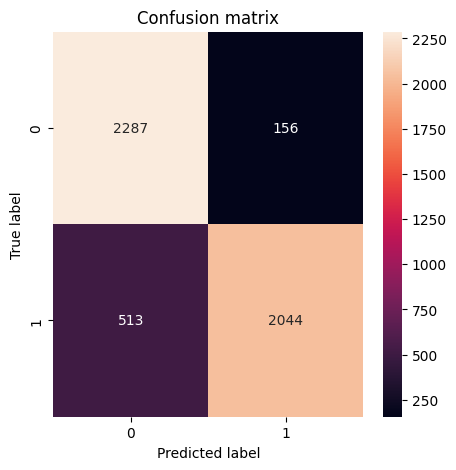

In [ ]:
# Оцінка моделі на тестових даних
results = model.evaluate(X_test, y_test)
print(results)

# Побудова confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Fashion MNIST Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# Розмір датасету
print("Розмір тренувального датасету:", len(x_train))
print("Розмір тестового датасету:", len(x_test))

Розмір тренувального датасету: 60000
Розмір тестового датасету: 10000


In [ ]:
# Розподіл класів
unique, counts = np.unique(y_train, return_counts=True)
print("Розподіл класів у тренувальному датасеті:", dict(zip(unique, counts)))

Розподіл класів у тренувальному датасеті: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


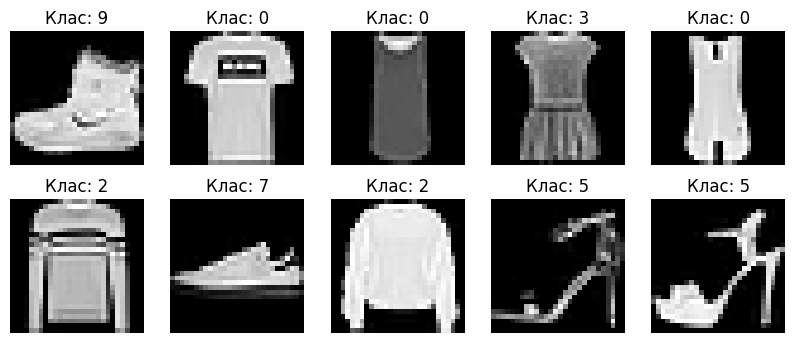

In [ ]:
# Візуалізація кількох зображень
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Клас: {y_train[i]}")
    ax.axis('off')
plt.show()

## Experiments

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

In [ ]:
def create_model_with_hparams(
    hidden_layers: int = 2,
    hidden_units: int = 128,
    hidden_activation: str = "relu",
    kernel_initializer: str = "he_normal",
    use_l2: bool = False, use_dropout: bool = False,
    optimizer: str = "adam",
):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))

    for _ in range(hidden_layers):
        model.add(keras.layers.Dense(
            hidden_units,
            activation=hidden_activation,
            kernel_initializer=kernel_initializer,
            kernel_regularizer=(regularizers.l2() if use_l2 else None)
        ))
        if use_dropout:
            model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(10, activation='softmax'))

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

**GridSearchCV з бібліотеки sklearn** дозволяє автоматично знаходити оптимальні значення гіперпараметрів шляхом перебору заданого набору значень та оцінки якості моделі на валідаційних даних.

https://adriangb.com/scikeras/stable/migration.html

In [ ]:
# Створення об'єкту KerasClassifier
model = KerasClassifier(model=create_model_with_hparams, optimizer="adam", hidden_layers=2)
model.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'hidden_layers', 'class_weight'])

In [ ]:
# Визначення параметрів для перебору
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'hidden_layers': [1, 3],
    # 'hidden_units': [32, 64],
    # 'hidden_activation': ['relu', 'tanh'],
    # 'kernel_initializer': ['he_normal', 'glorot_uniform']
}

# Створення об'єкту GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Запуск пошуку оптимальних параметрів
grid_result = grid.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7719 - loss: 0.6721
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7645 - loss: 0.6802
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7699 - loss: 0.6725
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7682 - loss: 0.6769
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7580 - loss: 0.6925
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7596 - loss: 0.6908
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7682 - loss: 0.6700
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7543 - loss: 0.6966
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7656 - loss: 0.6615
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7626 - loss: 0.6733
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7500 - loss: 0.7031
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7652 - loss: 0.6770
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7820 - loss: 0.6330
Best: 0.853350 using {'hidden_layers': 1, 'optimizer': 'adam'}


Після завершення пошуку гіперпараметрів за допомогою GridSearchCV, результати зберігаються в атрибуті cv_results_. Цей атрибут є словником, що містить детальну інформацію про кожну комбінацію гіперпараметрів, що перевірялася, та її результати на крос-валідації.

In [ ]:
grid_result.cv_results_

{'mean_fit_time': array([4.16204389, 3.5063893 , 5.31943242, 7.14085595]),
 'std_fit_time': array([0.54325981, 0.14054948, 1.19599504, 0.33171393]),
 'mean_score_time': array([1.41414356, 1.75399272, 1.41980505, 2.64855878]),
 'std_score_time': array([0.10686011, 0.73912018, 0.0871207 , 0.45274513]),
 'param_hidden_layers': masked_array(data=[1, 1, 3, 3],
              mask=[False, False, False, False],
        fill_value=999999),
 'param_optimizer': masked_array(data=['adam', 'rmsprop', 'adam', 'rmsprop'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'hidden_layers': 1, 'optimizer': 'adam'},
  {'hidden_layers': 1, 'optimizer': 'rmsprop'},
  {'hidden_layers': 3, 'optimizer': 'adam'},
  {'hidden_layers': 3, 'optimizer': 'rmsprop'}],
 'split0_test_score': array([0.8506 , 0.8336 , 0.8484 , 0.85195]),
 'split1_test_score': array([0.85555, 0.85635, 0.8476 , 0.8591 ]),
 'split2_test_score': array([0.8539, 0.8485, 0.8368, 0.

**Ключові елементи cv_results_:**

- params: список словників, де кожен словник представляє комбінацію гіперпараметрів, що тестувалася.
- mean_test_score: середнє значення метрики якості (наприклад, точності) на тестових фолдах крос-валідації для кожної комбінації гіперпараметрів.
- std_test_score: стандартне відхилення метрики якості на тестових фолдах крос-валідації для кожної комбінації гіперпараметрів.
- rank_test_score: ранг кожної комбінації гіперпараметрів за середнім значенням метрики якості (1 - найкращий результат).
- split<n>_test_score: значення метрики якості на кожному фолді крос-валідації для кожної комбінації гіперпараметрів (де <n> - номер фолду).

**Інтерпретація результатів:**

- mean_test_score дає загальне уявлення про те, наскільки добре кожна комбінація гіперпараметрів працює в середньому.
- std_test_score показує, наскільки стабільні результати для кожної комбінації на різних фолдах крос-валідації. Низьке стандартне відхилення вказує на більш стабільну модель.
- rank_test_score допомагає швидко визначити найкращі комбінації гіперпараметрів.
- split<n>_test_score дозволяє детальніше проаналізувати результати на кожному фолді та виявити потенційні проблеми, такі як нестабільність на окремих фолдах.

## Візуалізація результатів

In [ ]:
red_df = pd.DataFrame(grid_result.cv_results_)
red_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layers,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,4.162044,0.543260,1.414144,0.106860,1,adam,"{'hidden_layers': 1, 'optimizer': 'adam'}",0.85060,0.85555,0.8539,0.853350,0.002058,1
1,3.506389,0.140549,1.753993,0.739120,1,rmsprop,"{'hidden_layers': 1, 'optimizer': 'rmsprop'}",0.83360,0.85635,0.8485,0.846150,0.009435,3
2,5.319432,1.195995,1.419805,0.087121,3,adam,"{'hidden_layers': 3, 'optimizer': 'adam'}",0.84840,0.84760,0.8368,0.844267,0.005290,4
3,7.140856,0.331714,2.648559,0.452745,3,rmsprop,"{'hidden_layers': 3, 'optimizer': 'rmsprop'}",0.85195,0.85910,0.8387,0.849917,0.008451,2


In [ ]:
# Виведення найкращих параметрів та результатів
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.853350 using {'hidden_layers': 1, 'optimizer': 'adam'}


### Гістограма розподілу результатів на крос-валідації

Дозволяє візуально оцінити розкид результатів для кожної комбінації гіперпараметрів.

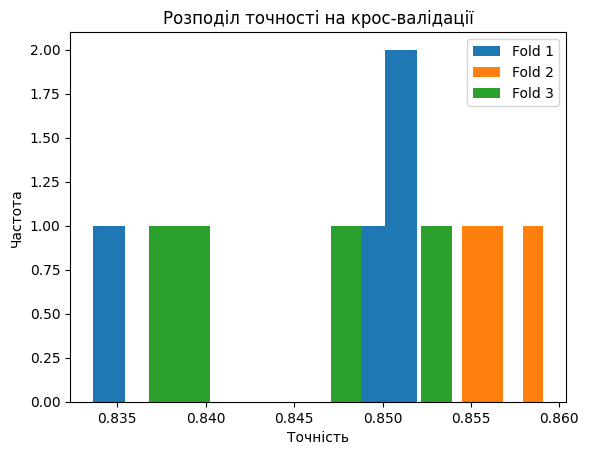

In [ ]:
for i in range(3):
    plt.hist(grid_result.cv_results_[f'split{i}_test_score'], label=f'Fold {i+1}')
plt.xlabel('Точність')
plt.ylabel('Частота')
plt.title('Розподіл точності на крос-валідації')
plt.legend()
plt.show()

### Boxplot для порівняння розподілу результатів для різних значень гіперпараметрів

Дозволяє порівняти розподіл метрики якості (медіана, квартилі, викиди) для різних значень одного гіперпараметра.

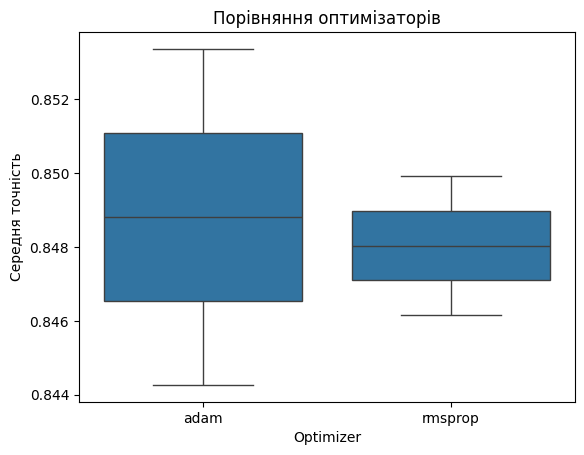

In [ ]:
sns.boxplot(x='param_optimizer', y='mean_test_score', data=red_df)
plt.xlabel('Optimizer')
plt.ylabel('Середня точність')
plt.title('Порівняння оптимізаторів')
plt.show()

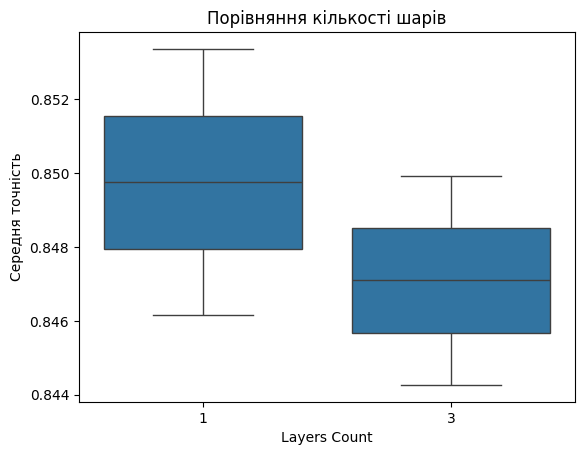

In [ ]:
sns.boxplot(x='param_hidden_layers', y='mean_test_score', data=red_df)
plt.xlabel('Layers Count')
plt.ylabel('Середня точність')
plt.title('Порівняння кількості шарів')
plt.show()

**Розподіл результатів на крос-валідації:**

- *Широкий розподіл*: вказує на те, що модель чутлива до вибору даних для тренування та валідації. Це може свідчити про перенавчання або недостатню кількість даних.
- *Вузький розподіл*: вказує на більш стабільну модель, яка менш чутлива до вибору даних для тренування та валідації.
- *Зміщення розподілу*: якщо розподіл на деяких фолдах зміщений в бік нижчих значень метрики, це може вказувати на проблеми з цими фолдами (наприклад, нерепрезентативна вибірка даних).

# Homework

https://complex-valued-neural-networks.readthedocs.io/en/stable/code_examples/fashion_mnist.html